***Binomial Distribution***

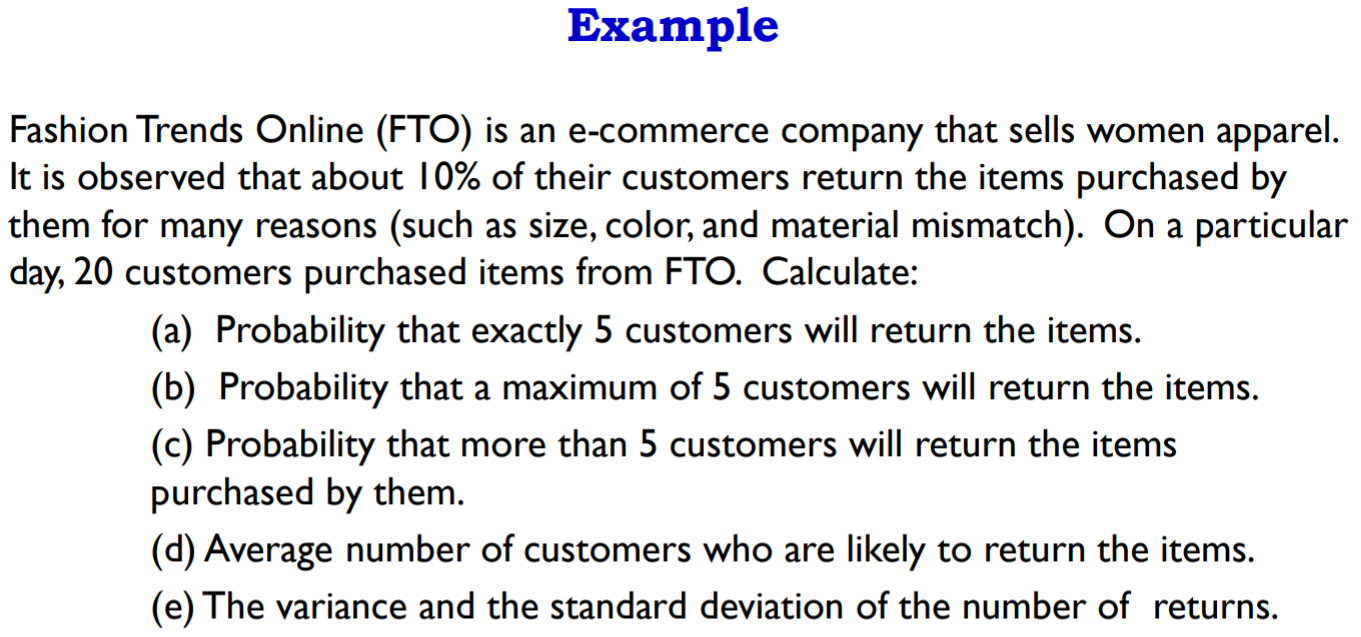

In [ ]:
#1
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
stats.binom.pmf(5,20,0.1)

0.03192136111995428

Text(0.5, 0, 'Number of item returned')

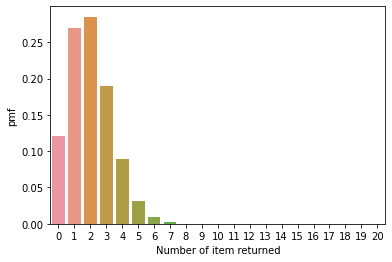

In [ ]:
#Visualization of pmf with successful no of trials

pmf_df = pd.DataFrame({'success':range(0,21),'pmf':list(stats.binom.pmf(range(0,21),20,0.1))})

#Creating a bar plot

sn.barplot(x=pmf_df.success, y=pmf_df.pmf)
plt.ylabel('pmf')
plt.xlabel('Number of item returned')


In [ ]:
#2
stats.binom.cdf(5,20,0.1)

0.988746865835491

In [ ]:
#3
1-stats.binom.cdf(5,20,0.1)

0.011253134164509015

In [ ]:
#4&5
mean, var = stats.binom.stats(20,0.1)
print('Average:', mean, "Variance:", var)

Average: 2.0 Variance: 1.8


***Poisson Distribution***

The number of calls coming to a call center follows a Poisson distribution. On average, 10 calls arrive every hour
1. Calculate the probability that the number of calls will be max. 5
2. Calculate the probability that the number of calls over a 3-hour period will exceed 30.

In [ ]:
stats.poisson.cdf(5,10)

0.06708596287903189

In [ ]:
1-stats.poisson.cdf(30,30)

0.45164848742208863

In [ ]:
#Visualizee possion distribution for all values from 0 to 30

pmf_df=pd.DataFrame({'success':range(0,30), 'pmf':list(stats.poisson.pmf(range(0,30),10))})

Text(0.5, 0, 'Number of Calls Received')

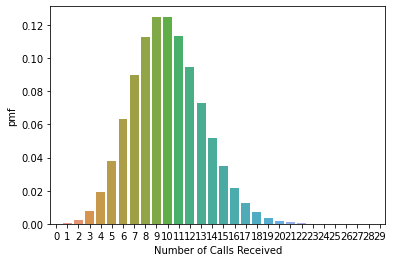

In [ ]:
#Creating a barplot

sn.barplot(x=pmf_df.success, y=pmf_df.pmf)
plt.xlabel('Number of Calls Received')

***Exponential Distribution***

The time to failure o an ivonic system follows an exponential distribution with a mean time between failures(MTBF) of 1000 hrs. Calculate:
1. Prob(system will fail before 1000 hrs)
2. Prob(it will not fail up to 2000 hrs)
3. The time by which 10% of the system will fail(i.e. Calculate P10 life)

In [ ]:
#1
stats.expon.cdf(1000,loc=1/1000,scale=1000)

0.6321201909489326

In [ ]:
#2
1-stats.expon.cdf(2000,loc=1/1000,scale=1000)

0.13533541857196352

In [ ]:
#3
stats.expon.ppf(0.1,loc=1/1000,scale=1000)

105.36151565782632

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

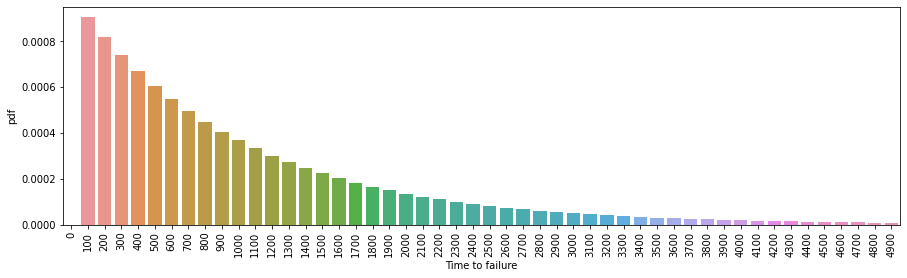

In [ ]:
#Visucalize against different time
pdf_df= pd.DataFrame({'success':range(0,5000,100),'pdf':list(stats.expon.pdf(range(0,5000,100),loc=1/1000,scale=1000))})

plt.figure(figsize=(15,4))
sn.barplot(x=pdf_df.success, y=pdf_df.pdf)
plt.xlabel('Time to failure')
plt.xticks(rotation=90)

In [ ]:
import warnings

In [ ]:
beml_df = pd.read_csv('BEML.csv')
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [ ]:
glaxo_df = pd.read_csv('GSK.csv')
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,04-01-2010,43.080002,43.130001,42.889999,43.83,42.970001,22.54,31.40
1,05-01-2010,41.990002,42.080002,41.619999,42.67,41.830002,21.95,48.59
2,06-01-2010,41.560001,41.700001,41.290001,42.17,41.340000,21.69,55.50
3,07-01-2010,41.400002,41.549999,41.020000,42.31,41.480000,21.76,52.88
4,08-01-2010,41.060001,41.160000,40.770000,41.92,41.099998,21.56,88.56


In [ ]:
beml_df=beml_df[['Date','Close']]
glaxo_df=glaxo_df[['Date','Close']]

In [ ]:
glaxo_df=glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df=beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [ ]:
glaxo_df.head(5)

,Date,Close
Date,,
2010-04-01,04-01-2010,42.970001
2010-05-01,05-01-2010,41.830002
2010-06-01,06-01-2010,41.340000
2010-07-01,07-01-2010,41.480000
2010-08-01,08-01-2010,41.099998


In [ ]:
beml_df.head(5)

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.plot(glaxo_df.Close)
plt.xlabel("Time")
plt.ylabel("Close Price")

Text(0, 0.5, 'Close Price')

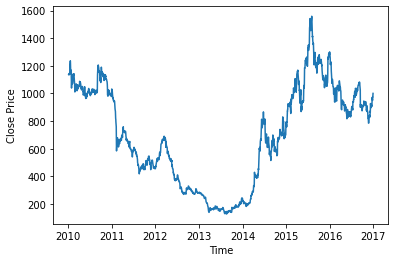

In [ ]:
plt.plot(beml_df.Close)
plt.xlabel("Time")
plt.ylabel("Close Price")

In [ ]:
glaxo_df['gain']=glaxo_df.Close.pct_change(periods=1)
beml_df['gain']=beml_df.Close.pct_change(periods=1)
glaxo_df.head(5)

,Date,Close,gain
Date,,,
2010-04-01,04-01-2010,42.970001,NaN
2010-05-01,05-01-2010,41.830002,-0.026530
2010-06-01,06-01-2010,41.340000,-0.011714
2010-07-01,07-01-2010,41.480000,0.003387
2010-08-01,08-01-2010,41.099998,-0.009161


In [ ]:
glaxo_df=glaxo_df.dropna()
beml_df=beml_df.dropna()

Text(0, 0.5, 'gain')

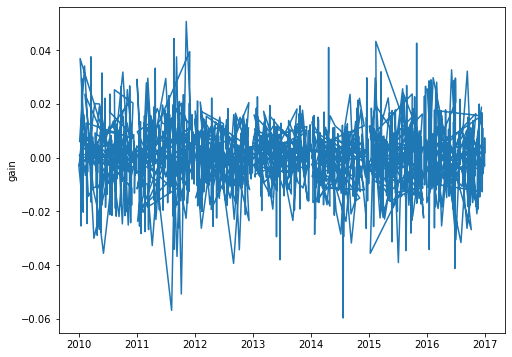

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(glaxo_df.index, glaxo_df.gain)
plt.ylabel('gain')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


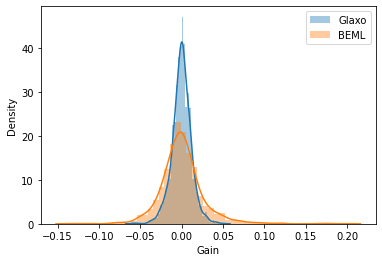

In [ ]:
sn.distplot(glaxo_df.gain, label= 'Glaxo')
sn.distplot(beml_df.gain, label= 'BEML')
plt.xlabel('Gain')
plt.ylabel('Density')
plt.legend()

In [ ]:
#Mean and Variance
print('Daily gain of Glaxo')
print('______________')
print('Mean:', round(glaxo_df.gain.mean(),4))
print('Standard Deviation:', round(glaxo_df.gain.std(),4))

Daily gain of Glaxo
______________
Mean: 0.0
Standard Deviation: 0.0117


In [ ]:
#Mean and Variance
print('Daily gain of BEML')
print('______________')
print('Mean:', round(beml_df.gain.mean(),4))
print('Standard Deviation:', round(beml_df.gain.std(),4))

Daily gain of BEML
______________
Mean: 0.0003
Standard Deviation: 0.0264


In [ ]:
beml_df.gain.describe()

count    1738.000000
mean        0.000271
std         0.026431
min        -0.133940
25%        -0.013736
50%        -0.001541
75%         0.011985
max         0.198329
Name: gain, dtype: float64

In [ ]:
#Confidence Interval

from scipy import stats
import numpy as np

In [ ]:
glaxo_df_ci = stats.norm.interval(0.95, loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std())
print('Gain at 95% confidence interval is:', np.round(glaxo_df_ci,4))

Gain at 95% confidence interval is: [-0.023  0.023]


In [ ]:
beml_df_ci = stats.norm.interval(0.95, loc=beml_df.gain.mean(),scale=beml_df.gain.std())
print('Gain at 95% confidence interval is:', np.round(beml_df_ci,4))

Gain at 95% confidence interval is: [-0.0515  0.0521]
